# Analysis of New York City AirBnB Listings

The dataset contains information describing New York City AirBnB listings, such as the price to book a stay at the listing for a night and the neighbourhood the unit is located in. Such information could be useful for someone interested in using AirBnB to host a rental unit in New York City. I will approach this project as if the client is trying to gain insights about the demand for rentals of different room types in the different NYC boroughs.

Some questions I aim to answer are as follows:
- Which boroughs in New York City have the most and least rental properties available?
- Which room type is most and least available on AirBnB in NYC?
- What is the average nightly rental price by borough?
- What is the average nightly rental price by room type?
- What is the average nightly rental price by room type and borough?
- What room type is most available in each borough?

## 1. Importing Libraries and Data

### Import Pandas, NumPy, Matplotlib, and Seaborn

We will use Pandas to create and manipulate data frames. NumPy will allow us to work with arrays and perform mathematical functions on the data. Matplotlib and Seaborn will be used for visualizations.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Read the Dataset In and Create a Dataframe

Use Pandas to read in our data from a csv and store it as a dataframe.

In [2]:
df = pd.read_csv("airbnb.csv")

## View the Dataframe 

Viewing the dataframe lets us see its structure. We can see the size of the dataframe. The number of rows in the dataframe tells us how many listings are in the dataset, and the number of columns tells us how many characteristics we have to describe the listings. We can read through several rows to understand more about the content of the data we are working with.

In [3]:
df

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30473,43022976,8/31/2015,10 Mins to Time Square/two floors,Queens,Apartment,NaN,Entire home/apt,11101.0,5.0,1,0,300,NaN
30474,42993382,8/31/2015,"1BR ocean view & F,Q train st",Brooklyn,Apartment,NaN,Private room,11224.0,2.0,1,0,125,NaN
30475,43033067,8/31/2015,Amazing Private Room,Brooklyn,Other,NaN,Private room,11206.0,1.0,1,0,80,NaN
30476,43000991,8/31/2015,Charming private female room: UWS,Manhattan,Apartment,NaN,Private room,10025.0,1.0,1,0,35,NaN


By reviewing the dataset, we see that we are working with numeric and text data. Our dataset contains some invalid data (cells with NaN values). The "Host Since" column contains dates. We can use the Pandas function "dtypes" to see the data type of each column in the dataframe.

In [4]:
print(df.dtypes)

Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64
dtype: object


# 2. Clean the Data

## Eliminate Non-Essential Data

Some of the data is not necessary given the scope of this project. For simplicity, I will remove these columns.

In [5]:
df = df.drop('Host Id', axis=1)
df = df.drop('Host Since', axis=1)
df = df.drop('Name', axis=1)
df = df.drop('Review Scores Rating (bin)', axis=1)
df = df.drop('Number of Records', axis=1)
df = df.drop('Number Of Reviews', axis=1)
df = df.drop('Review Scores Rating', axis=1)
df = df.drop('Zipcode', axis=1)
df = df.drop('Property Type', axis=1)

## Remove Null Values

Similarly, I will simply remove rows with null values in the "Beds" column.

In [6]:
df['Beds'].replace('', np.nan, inplace=True)
df['Neighbourhood '].replace('', np.nan, inplace=True)
df['Room Type'].replace('', np.nan, inplace=True)
df['Price'].replace('', np.nan, inplace=True)

In [7]:
print(df['Beds'].isnull().sum())
print(df['Neighbourhood '].isnull().sum())
print(df['Room Type'].isnull().sum())
print(df['Price'].isnull().sum())

85
0
0
0


In [8]:
df.dropna(subset=['Beds'], inplace=True)

In [9]:
print(df['Beds'].isnull().sum())

0


In [10]:
df.dropna(subset=['Price'], inplace=True)

## Eliminate Commas from Numeric Values

We must remove commas from the numeric values in the "Price" column in order to use them for analysis. For example, we need to convert the data type of "Price" to integer, and this can only be done if numbers are written 

In [11]:
df['Price']=df['Price'].str.replace(',','')

## Convert Data Types

Our remaining columns of data will be easier to work with if we convert their data types to be more specific and accurate.

In [12]:
df['Room Type'] = df['Room Type'].astype(str)
df['Neighbourhood '] = df['Neighbourhood '].astype(str)

In [13]:
df['Beds'] = df['Beds'].astype(int)
df['Price'] = df['Price'].astype(int)

We can quickly review our dataframe again after making the previous changes.

In [14]:
df

,Neighbourhood,Room Type,Beds,Price
0,Brooklyn,Entire home/apt,1,145
1,Brooklyn,Private room,1,37
2,Manhattan,Private room,1,28
3,Manhattan,Entire home/apt,3,199
4,Manhattan,Private room,3,549
...,...,...,...,...
30473,Queens,Entire home/apt,5,300
30474,Brooklyn,Private room,2,125
30475,Brooklyn,Private room,1,80
30476,Manhattan,Private room,1,35


In [15]:
print(df.dtypes)

Neighbourhood     object
Room Type         object
Beds               int32
Price              int32
dtype: object


# 3. Create Visualizations

There are various visualizations we can create to portray relationships between our variables.

## Visualize the Average AirBnB Listing Prices in Each NYC Borough?

Print the list of unique "Neighborhood" values so going forward we know exactly what values should be represented in our visualization.

In [16]:
print(df['Neighbourhood '].unique())

['Brooklyn' 'Manhattan' 'Queens' 'Bronx' 'Staten Island']


Use pandas to calculate and store the average price of AirBnB listings in each neighborhood. These averages are calculated using values stored in the "Neighbourhood" and "Price" columns of our dataframe.

In [17]:
avg_Brooklyn_price = df.loc[df['Neighbourhood '] == 'Brooklyn', 'Price'].mean()
avg_Manhattan_price = df.loc[df['Neighbourhood '] == 'Manhattan', 'Price'].mean()
avg_Queens_price = df.loc[df['Neighbourhood '] == 'Queens', 'Price'].mean()
avg_Bronx_price = df.loc[df['Neighbourhood '] == 'Bronx', 'Price'].mean()
avg_Staten_Island_price = df.loc[df['Neighbourhood '] == 'Staten Island', 'Price'].mean()

Now we use Matplotlib to create our visualization. We will create a bar chart.

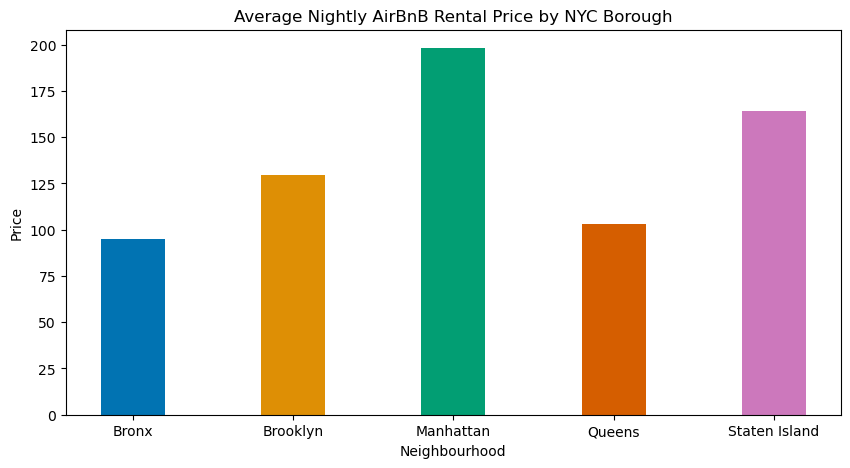

In [18]:
# creating the dataset
data = {'Bronx': avg_Bronx_price, 'Brooklyn': avg_Brooklyn_price, 'Manhattan': avg_Manhattan_price, 'Queens': avg_Queens_price,
        'Staten Island': avg_Staten_Island_price}
neighborhoods = list(data.keys())
avg_prices = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(neighborhoods, avg_prices, color = sns.color_palette("colorblind"),
        width = 0.4)
 
plt.xlabel("Neighbourhood")
plt.ylabel("Price")
plt.title("Average Nightly AirBnB Rental Price by NYC Borough")
plt.show()

Manhattan has the highest nightly listing price, the Bronx has the lowest. Here we see that there is roughly a $100 difference between average AirBnB listing prices by NYC neighborhoods. It would be useful to gather data related to prices of units for purchase to further evaluate which neighborhood may yield the highest longterm profits. Also, additional data related to most visited neighborhoods in NYC may be beneficial in this regard.

## Visualize the Number of Listings in Each NYC Borough

First we calculate and store the number of each listing.

In [19]:
count_Brooklyn_listings = len(df[df['Neighbourhood ']=='Brooklyn'])
count_Manhattan_listings = len(df[df['Neighbourhood ']=='Manhattan'])
count_Queens_listings = len(df[df['Neighbourhood ']=='Queens'])
count_Bronx_listings = len(df[df['Neighbourhood ']=='Bronx'])
count_Staten_Island_listings = len(df[df['Neighbourhood ']=='Staten Island'])

Then we create another bar chart using Matplotlib.

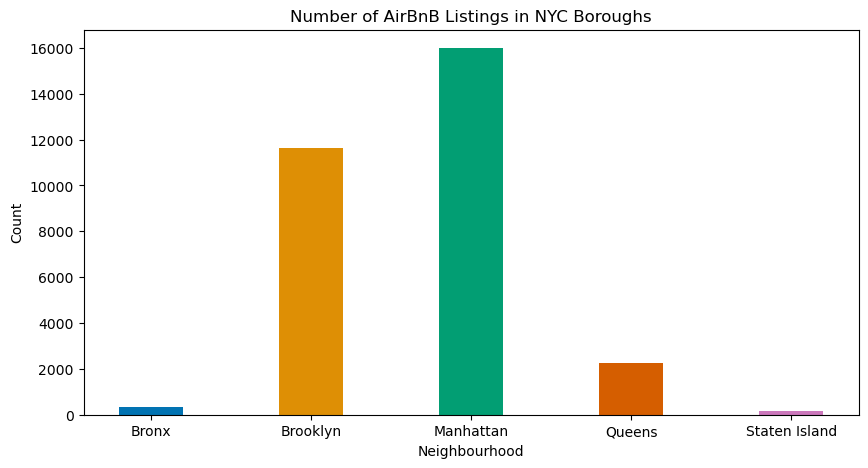

In [20]:
# creating the dataset
data = {'Bronx': count_Bronx_listings, 'Brooklyn': count_Brooklyn_listings, 'Manhattan': count_Manhattan_listings, 'Queens': count_Queens_listings,
        'Staten Island': count_Staten_Island_listings}
neighborhoods = list(data.keys())
listing_counts = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(neighborhoods, listing_counts, color=sns.color_palette("colorblind"),
        width = 0.4)
 
plt.xlabel("Neighbourhood")
plt.ylabel("Count")
plt.title("Number of AirBnB Listings in NYC Boroughs")
plt.show()

Manhattan has the highest number of listings, and Brooklyn the second highest. So there is more AirBnB competition in these areas. Again, looking at most-visited NYC neighborhoods data may be helpful in determining if the level of competition shown here is a significant factor to consider when determining where to purchase a property. Staten Island and the Bronx have very few listings, so depending on how often people visit these areas, these may be worthwhile locations to consider purchasing a property in given the lesser competition.

## Visualize the Percentage of NYC AirBnB Listings by Borough

We can use the previously defined variables for creating this pie chart. 

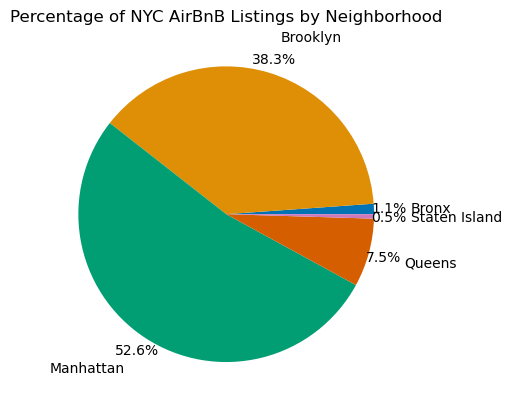

In [21]:
plt.pie(listing_counts, labels = neighborhoods,  colors=sns.color_palette('colorblind'), autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.25)
plt.title(
    label="Percentage of NYC AirBnB Listings by Neighborhood"
)
plt.show()

## Visualize the Average Price of Each Listing by Room Type

In [22]:
print(df['Room Type'].unique())

['Entire home/apt' 'Private room' 'Shared room']


In [23]:
avg_entire_price = df.loc[df['Room Type'] == 'Entire home/apt', 'Price'].mean()
avg_Manhattan_price = df.loc[df['Room Type'] == 'Private room', 'Price'].mean()
avg_Queens_price = df.loc[df['Room Type'] == 'Shared room', 'Price'].mean()

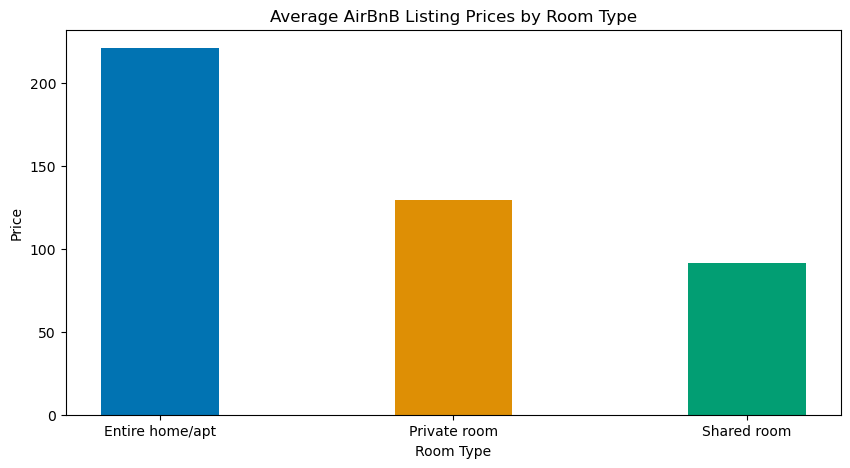

In [24]:
# creating the dataset
data = {'Entire home/apt': avg_entire_price, 'Private room': avg_Brooklyn_price, 'Shared room': avg_Manhattan_price}
room_type = list(data.keys())
avg_prices = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(room_type, avg_prices, color=sns.color_palette("colorblind"),
        width = 0.4)
 
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.title("Average AirBnB Listing Prices by Room Type")
plt.show()

Private room and shared room have the potential to earn more money per night depending on demand for those room types. The property manager might consider who their intended tenants are (families, tourists, business travelers, etc.) that they would like to market to, or if they are flexible on this, they could focus solely on what room type is most in demand in general.

## Visualize the Count of Each Room Type

In [25]:
count_entire_home_listings = len(df[df['Room Type']=='Entire home/apt'])
count_private_room_listings = len(df[df['Room Type']=='Private room'])
count_shared_room_listings = len(df[df['Room Type']=='Shared room'])

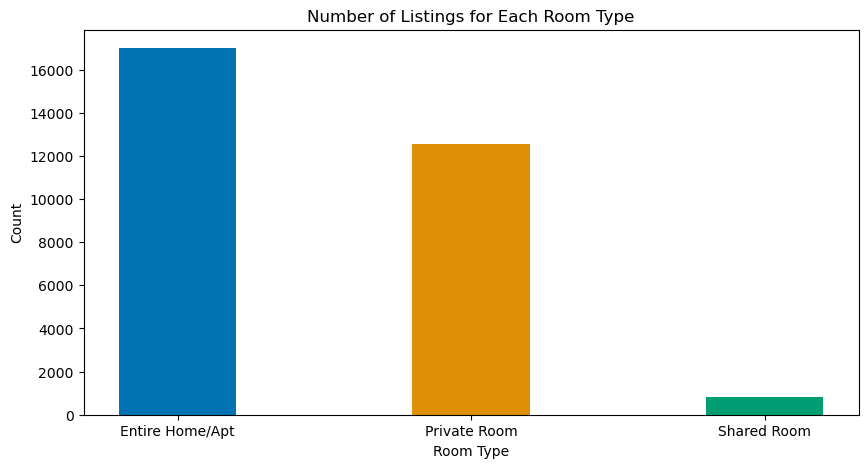

In [26]:
data = {'Entire Home/Apt': count_entire_home_listings, 'Private Room': count_private_room_listings, 'Shared Room': count_shared_room_listings}
room_type = list(data.keys()) 
listing_counts = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(room_type, listing_counts, color=sns.color_palette("colorblind"),
        width = 0.4)
 
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.title("Number of Listings for Each Room Type")
plt.show()

Demand for each room type is again relevant

## Visualize the Average Nightly Prices by Room Type and Borough

I want to look at the average nightly price of listings depending on the room type and neighbourhood.

In [27]:
avg_Brooklyn_price = df.loc[df['Neighbourhood '] == 'Brooklyn', 'Price'].mean()

In [28]:
df_manhattan = df.loc[df['Neighbourhood '] == 'Manhattan']
df_manhattan_entire_price_avg = df_manhattan.loc[df_manhattan['Room Type'] == 'Entire home/apt', 'Price'].mean()
df_manhattan_private_price_avg = df_manhattan.loc[df_manhattan['Room Type'] == 'Private room', 'Price'].mean()
df_manhattan_shared_price_avg = df_manhattan.loc[df_manhattan['Room Type'] == 'Shared room', 'Price'].mean()

In [29]:
df_bronx = df.loc[df['Neighbourhood '] == 'Bronx']
df_bronx_entire_price_avg = df_bronx.loc[df_bronx['Room Type'] == 'Entire home/apt', 'Price'].mean()
df_bronx_private_price_avg = df_bronx.loc[df_bronx['Room Type'] == 'Private room', 'Price'].mean()
df_bronx_shared_price_avg = df_bronx.loc[df_bronx['Room Type'] == 'Shared room', 'Price'].mean()

In [30]:
df_brooklyn = df.loc[df['Neighbourhood '] == 'Brooklyn']
df_brooklyn_entire_price_avg = df_brooklyn.loc[df_brooklyn['Room Type'] == 'Entire home/apt', 'Price'].mean()
df_brooklyn_private_price_avg = df_brooklyn.loc[df_brooklyn['Room Type'] == 'Private room', 'Price'].mean()
df_brooklyn_shared_price_avg = df_brooklyn.loc[df_brooklyn['Room Type'] == 'Shared room', 'Price'].mean()

In [31]:
df_staten = df.loc[df['Neighbourhood '] == 'Staten Island']
df_staten_entire_price_avg = df_staten.loc[df_staten['Room Type'] == 'Entire home/apt', 'Price'].mean()
df_staten_private_price_avg = df_staten.loc[df_staten['Room Type'] == 'Private room', 'Price'].mean()
df_staten_shared_price_avg = df_staten.loc[df_staten['Room Type'] == 'Shared room', 'Price'].mean()

In [32]:
df_queens = df.loc[df['Neighbourhood '] == 'Queens']
df_queens_entire_price_avg = df_queens.loc[df_queens['Room Type'] == 'Entire home/apt', 'Price'].mean()
df_queens_private_price_avg = df_queens.loc[df_queens['Room Type'] == 'Private room', 'Price'].mean()
df_queens_shared_price_avg = df_queens.loc[df_queens['Room Type'] == 'Shared room', 'Price'].mean()

In [33]:
neighbourhoods = df['Neighbourhood '].unique() 
print(neighbourhoods)

['Brooklyn' 'Manhattan' 'Queens' 'Bronx' 'Staten Island']


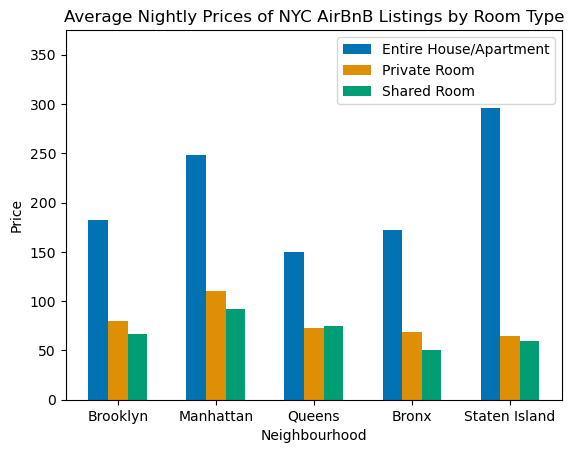

In [52]:
entire_avgs = [df_brooklyn_entire_price_avg, df_manhattan_entire_price_avg, df_queens_entire_price_avg, df_bronx_entire_price_avg, df_staten_entire_price_avg]
private_avgs = [df_brooklyn_private_price_avg, df_manhattan_private_price_avg, df_queens_private_price_avg, df_bronx_private_price_avg, df_staten_private_price_avg]
shared_avgs = [df_brooklyn_shared_price_avg, df_manhattan_shared_price_avg, df_queens_shared_price_avg, df_bronx_shared_price_avg, df_staten_shared_price_avg]

X_axis = np.arange(len(neighbourhoods))

sns.set_palette('colorblind')
  
plt.bar(X_axis - 0.2, entire_avgs, 0.2, label = 'Entire House/Apartment')
plt.bar(X_axis, private_avgs, 0.2, label = 'Private Room')
plt.bar(X_axis + 0.2, shared_avgs, 0.2, label = 'Shared Room')
  
plt.xticks(X_axis, neighbourhoods)
plt.xlabel("Neighbourhood")
plt.ylabel("Price")
plt.ylim(0, 375)
plt.title("Average Nightly Prices of NYC AirBnB Listings by Room Type")
plt.legend(loc='upper right')
plt.show()

Staten Island has the highest nightly listing price for entire homes. There is minimal difference in nightly price for single rooms or shared rooms based on neighborhood. It would be useful to gather data related to prices of units for purchase to further evaluate which neighborhood may yield the highest longterm profits. Also, additional data related to most visited neighborhoods in NYC may be beneficial in this regard. We found earlier that Staten Island has the least number of listings, which might make it easier for the property manager to compete depending on demand levels.

I want to look at the count of listings depending on the room type and neighbourhood.

In [35]:
df_manhattan_entire_count = len(df_manhattan.loc[df_manhattan['Room Type'] == 'Entire home/apt'])
df_manhattan_private_count = len(df_manhattan.loc[df_manhattan['Room Type'] == 'Private room'])
df_manhattan_shared_count = len(df_manhattan.loc[df_manhattan['Room Type'] == 'Shared room'])

In [36]:
df_bronx_entire_count = len(df_bronx.loc[df_bronx['Room Type'] == 'Entire home/apt'])
df_bronx_private_count = len(df_bronx.loc[df_bronx['Room Type'] == 'Private room'])
df_bronx_shared_count = len(df_bronx.loc[df_bronx['Room Type'] == 'Shared room'])

In [37]:
df_brooklyn_entire_count = len(df_brooklyn.loc[df_brooklyn['Room Type'] == 'Entire home/apt'])
df_brooklyn_private_count = len(df_brooklyn.loc[df_brooklyn['Room Type'] == 'Private room'])
df_brooklyn_shared_count = len(df_brooklyn.loc[df_brooklyn['Room Type'] == 'Shared room'])

In [38]:
df_staten_entire_count = len(df_staten.loc[df_staten['Room Type'] == 'Entire home/apt'])
df_staten_private_count = len(df_staten.loc[df_staten['Room Type'] == 'Private room'])
df_staten_shared_count = len(df_staten.loc[df_staten['Room Type'] == 'Shared room'])

In [39]:
df_queens_entire_count = len(df_queens.loc[df_queens['Room Type'] == 'Entire home/apt'])
df_queens_private_count = len(df_queens.loc[df_queens['Room Type'] == 'Private room'])
df_queens_shared_count = len(df_queens.loc[df_queens['Room Type'] == 'Shared room'])

[0 1 2 3 4]


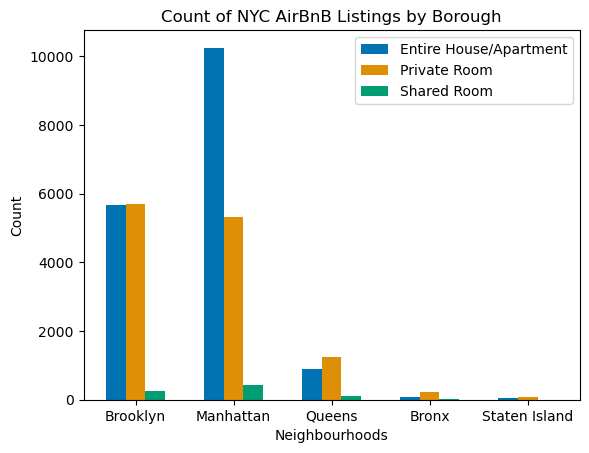

In [41]:
entire_count = [df_brooklyn_entire_count, df_manhattan_entire_count, df_queens_entire_count, df_bronx_entire_count, df_staten_entire_count]
private_count = [df_brooklyn_private_count, df_manhattan_private_count, df_queens_private_count, df_bronx_private_count, df_staten_private_count]
shared_count = [df_brooklyn_shared_count, df_manhattan_shared_count, df_queens_shared_count, df_bronx_shared_count, df_staten_shared_count]

X_axis = np.arange(len(neighbourhoods))
print(X_axis)

sns.set_palette('colorblind')
  
plt.bar(X_axis - 0.2, entire_count, 0.2, label = 'Entire House/Apartment')
plt.bar(X_axis, private_count, 0.2, label = 'Private Room')
plt.bar(X_axis + 0.2, shared_count, 0.2, label = 'Shared Room')
  
plt.xticks(X_axis, neighbourhoods)
plt.xlabel("Neighbourhoods")
plt.ylabel("Count")
plt.title("Count of NYC AirBnB Listings by Borough")
plt.legend(loc='upper right')
plt.show()